In [1]:
import json

In [3]:
yelp_academic_dataset_business="/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/tip.json"
reviews=[]
with open(yelp_academic_dataset_business) as infile:
    for line in infile:
        reviews.append(line)

In [4]:
len(reviews)

219614

In [5]:
reviews[0]

'{"business_id":"yQab5dxZzgBLTEHCw9V7_w","date":"2012-01-18","likes":0,"text":"It\'s a beautiful day to fly in North Carolina. And now, let\'s see if we can find us some sweet tea","user_id":"TvkqJ8YEIsTb16RnnrNyfQ"}\n'

In [6]:
import ast

In [12]:
reviews_train={}
reviews_test={}
for i in range(0,len(reviews)):
    
    r=reviews[i]
    if(r.find("null") == -1):
        e=ast.literal_eval(r)
        if e['date']>"2017-01-01":
            reviews_test[e['business_id']+"~"+e['user_id']+"~"+e['date']]=e
        else:
            reviews_train[e['business_id']+"~"+e['user_id']+"~"+e['date']]=e
#         if e['business_id'] in b_dict:
#             b_dict[e['business_id']].add(e['user_id'])
#         else:
#             b_dict[e['business_id']]=set()
#             b_dict[e['business_id']].add(e['user_id'])
#         if e['user_id'] in u_dict:
#             u_dict[e['user_id']].add(e['business_id'])
#         else:
#             u_dict[e['user_id']]=set()
#             u_dict[e['user_id']].add(e['business_id'])
       
        

In [13]:
len(reviews_test)
len(reviews_train)

187769

In [14]:
b_dict={}
u_dict={}

for k,e in reviews_train.items():
    if e['business_id'] in b_dict:
        b_dict[e['business_id']].add(e['user_id'])
    else:
        b_dict[e['business_id']]=set()
        b_dict[e['business_id']].add(e['user_id'])
    if e['user_id'] in u_dict:    
        u_dict[e['user_id']].add(e['business_id'])
    else:
        u_dict[e['user_id']]=set()
        u_dict[e['user_id']].add(e['business_id'])

In [15]:
b_dict_test={}
u_dict_test={}

for k,e in reviews_test.items():
    if e['business_id'] in b_dict_test:
        b_dict_test[e['business_id']].add(e['user_id'])
    else:
        b_dict_test[e['business_id']]=set()
        b_dict_test[e['business_id']].add(e['user_id'])
    if e['user_id'] in u_dict_test:    
        u_dict_test[e['user_id']].add(e['business_id'])
    else:
        u_dict_test[e['user_id']]=set()
        u_dict_test[e['user_id']].add(e['business_id'])

In [16]:
import numpy as np

In [12]:
# np.save('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict.npz', b_dict) 
# np.save('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict.npz', u_dict) 

In [11]:
# b=list(b_dict.keys())
# recommendation_b={}
# for i in range(0,len(b_dict.keys())):
#     print(i)
#     for j in range(i+1,len(b_dict.keys())):
#         intersection=b_dict[b[i]].intersection(b_dict[b[j]])
#         if len(intersection)>100:
#             diff1=b_dict[b[i]].difference(b_dict[b[j]])
#             if b[j] in recommendation_b:
#                 recommendation_b[b[j]]=recommendation_b[b[j]].union(diff1)
#             else:
#                 recommendation_b[b[j]]=set()
#                 recommendation_b[b[j]]=recommendation_b[b[j]].union(diff1)
#             diff2=b_dict[b[j]].difference(b_dict[b[i]])
#             if b[i] in recommendation_b:
#                 recommendation_b[b[i]]=recommendation_b[b[i]].union(diff2)
#             else:
#                 recommendation_b[b[i]]=set()
#                 recommendation_b[b[i]]=recommendation_b[b[i]].union(diff2)
            
            

In [15]:
# len(recommendation_b[list(recommendation_b.keys())[10]])
# len(recommendation_b)

271

In [2]:
import pickle
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_train_t.pickle', 'wb') as handle:
#     pickle.dump(b_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_train_t.pickle', 'rb') as handle:
    bt_t = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train_t.pickle', 'rb') as handle:
    ut_t = pickle.load(handle)

In [3]:
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_test_t.pickle', 'wb') as handle:
#     pickle.dump(b_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_test_t.pickle', 'rb') as handle:
    bt_test_t = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test_t.pickle', 'rb') as handle:
    ut_test_t = pickle.load(handle)

In [4]:
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_train.pickle', 'rb') as handle:
    bt = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_train.pickle', 'rb') as handle:
    ut = pickle.load(handle)
with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict_test.pickle', 'rb') as handle:
    bt_test = pickle.load(handle)
    
# with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test_t.pickle', 'wb') as handle:
#     pickle.dump(u_dict_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict_test.pickle', 'rb') as handle:
    ut_test = pickle.load(handle)

In [31]:
#b_dict=np.load('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/b_dict.npz')
#u_dict=np.load('/Users/shaily/Desktop/Fall2018/Data_Mining/Project/Sample_data/Yelp_Updated_Data/u_dict.npy')

In [32]:
# b_dict.keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [5]:
import networkx as nx

In [6]:
G=nx.Graph()

In [7]:
G.add_nodes_from(list(bt.keys()))

In [8]:
G.add_nodes_from(list(ut.keys()))

In [9]:
b=list(bt.keys())
for i in range(0,len(bt.keys())):
    bu=bt[b[i]]
    for f in bu:
        G.add_edge(f,b[i])

In [10]:
b=list(bt.keys())
for i in range(0,len(bt.keys())):
    bu=bt_t[b[i]]
    for f in bu:
        G.add_edge(f,b[i])

In [11]:
G.number_of_nodes()

359007

In [12]:
G.number_of_edges()

871648

In [13]:
pr = nx.pagerank(G, alpha=0.8,max_iter=200)

In [71]:
b=list(bt.keys())
user_test=set(list(ut_test.keys()))
ut2=set(list(ut_test_t.keys()))
user_test=user_test.union(ut2)
recommendation_b2={}

In [72]:
b_dict=bt
for i in range(0,len(b_dict.keys())):
    print(i)
    for j in range(i+1,len(b_dict.keys())):
        
        intersection=b_dict[b[i]].intersection(b_dict[b[j]])
        
        if len(intersection)>500:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=5#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=5#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=5#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=5#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=5#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=5#len(intersection)
        elif len(intersection)>100:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1#len(intersection)
            else:
                
                recommendation_b2[b[j]]={}
                for m in diff1:
                    
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1#len(intersection)
        elif len(intersection)>50:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1/2#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1/2#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1/2#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1/2#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1/2#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1/2#len(intersection)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [73]:
cross_pagerank_precision_1=[]
pagerank_precision_1=[]
cross_pagerank_recall_1=[]
pagerank_recall_1=[]

In [74]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_1.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_1.append(n1/(n1+n))

In [75]:
def b1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_precision_1.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
           # print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_recall_1.append(n1/(n1+n))

In [76]:
for i in range(4,-1,-1):
    a1(i)
    b1(i)

In [77]:
b_dict=bt
for i in range(0,len(b_dict.keys())):
    print(i)
    for j in range(i+1,len(b_dict.keys())):
        
        intersection=b_dict[b[i]].intersection(b_dict[b[j]])
        
        if len(intersection)>1000:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=150#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=150#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=150#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=150#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=150#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=150#len(intersection)
        elif len(intersection)>500:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2 :
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=50#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=50#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=50#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=50#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=50#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=50#len(intersection)
        elif len(intersection)>100:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=15#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=15#len(intersection)
            else:
                
                recommendation_b2[b[j]]={}
                for m in diff1:
                    
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=15#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=15#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=15#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=15#len(intersection)
        elif len(intersection)>50:
            diff1=b_dict[b[i]].difference(b_dict[b[j]])
            diff11=bt_t[b[i]].difference(bt_t[b[j]])
            diff1=diff1.union(diff11)
            if b[j] in recommendation_b2:
                for m in diff1:
                    if(m in user_test):
                        if m in recommendation_b2[b[j]]:
                            recommendation_b2[b[j]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[j]][m]=1#len(intersection)
            else:
                recommendation_b2[b[j]]={}
                for m in diff1:
                    if(m in user_test):
                        recommendation_b2[b[j]][m]=1#len(intersection)
        
            diff2=b_dict[b[j]].difference(b_dict[b[i]])
            diff22=bt_t[b[j]].difference(bt_t[b[i]])
            diff2=diff2.union(diff22)
            if b[i] in recommendation_b2:
                for m in diff2:
                    if(m in user_test):
                        if m in recommendation_b2[b[i]]:
                            recommendation_b2[b[i]][m]+=1#len(intersection)
                        else:
                            recommendation_b2[b[i]][m]=1#len(intersection)
            else:
                recommendation_b2[b[i]]={}
                for m in diff2:
                    if(m in user_test):
                        recommendation_b2[b[i]][m]=1#len(intersection)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [78]:
bussiness=set(recommendation_b2.keys()).intersection(set(bt_test.keys()))
bussiness2=set(recommendation_b2.keys()).intersection(set(bt_test_t.keys()))
#bussiness=bussiness.union(bussiness2)
bussiness=bussiness.intersection(bussiness2)
len(bussiness)

696

In [79]:
recommendation_b2['iCQpiavjjPzJ5_3gPD5Ebg'].items()

dict_items([('fFF3Mcu69LCpKA3ui5LWpg', 16), ('b7rchNJEp6Gaw0bHR-4s4g', 80.5), ('2BZy257iZdBEOa0v0vnGeA', 38.0), ('s1ycNwrpYQb2AYHJhhLNBA', 268.5), ('J1KUMJflFKE37ee1NC1z6A', 33.5), ('h40hmNhISzFdXbqH1tJZcQ', 33.5), ('ePERWULHzOTlJYrqG3k1pA', 16), ('qgcTkh9aCsedLmY8LI6p4Q', 16), ('203ouoqdHcFPksNGpCMVNA', 70.0), ('umeyMBuJUcW5hehXEoqyFg', 16), ('txu_KwZOGYG6O3yYHjztbg', 196.5), ('MNIrMozMbkwuch4IF_IjTA', 19.0), ('LwVUO_5jjHuJRhvl6hlHVg', 241.5), ('3nDUQBjKyVor5wV0reJChg', 198.0), ('mMdQvwWGrNeqPs3xARHezQ', 17.5), ('5IcWONw-ccqKjPI3_vNa0Q', 60.0), ('owlUazXSDLaxlOV7z8181g', 200.5), ('-p2ISrtcOFS87T2pkyIaNw', 52.5), ('xPqMjZrlX8BKRAyREd5WuA', 108.0), ('Mho2GibREwsPesKEyQbt8w', 150.5), ('l5RLxGVsoxQUAAL2dCvYYQ', 19.0), ('gvuvcjAVl1ElyXTgU80VRg', 191.0), ('SiKidCx57lIVwjjSygvRqg', 35.0), ('u450nDVIBUKgGVp9rZ62mA', 48), ('HQ3NvIPOL0gACvGSWqnEbw', 39.5), ('HXOfPXPMvdXNpQ_l0RRjKw', 33.5), ('emLNW6tae7RWSGhenwTRsA', 17.5), ('RIB4J2PDgOJnyEK-gXJrsg', 19.0), ('XYk552OWzrYviwebRCgEJA', 22.0), ('51

In [80]:
cross_pagerank_precision_2=[]
pagerank_precision_2=[]
cross_pagerank_recall_2=[]
pagerank_recall_2=[]

In [81]:
def a1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_precision_2.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(x[1])-(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    cross_pagerank_recall_2.append(n1/(n1+n))

In [82]:
def b1(lk):
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:100])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
            #print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_precision_2.append(n1/(n1+n))
    correct=0
    s=0
    n=0
    s1=0
    n1=0
    for b in bussiness:
        l=list(recommendation_b2[b].items())

        l=sorted(l,key=lambda x: -(pr[x[0]]*100000))
        selected2=set(l[0:])
        selected=set()
        for r in selected2:
            selected.add(r[0])
        actual=set(bt_test[b]).union(set(bt_test_t[b]))

        if len(selected.intersection(actual))>lk:#len(selected)/2:
            s1+=len(b_dict[b])
            n1+=1
           # print(len(selected.intersection(actual)),len(selected),len(actual),"------")
            correct+=1
        else:
            s+=len(b_dict[b])
            #print(len(selected.intersection(actual)),len(selected),len(actual))
            n+=1
    pagerank_recall_2.append(n1/(n1+n))

In [83]:
for i in range(4,-1,-1):
    a1(i)
    b1(i)

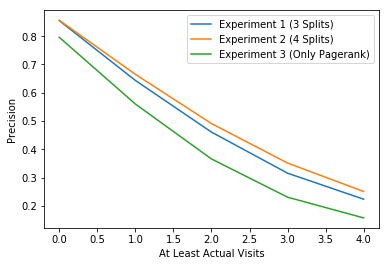

In [88]:
import matplotlib.pyplot as plt
a,=plt.plot(cross_pagerank_precision_1[::-1],label="Experiment 1 (3 Splits)")
b,=plt.plot(cross_pagerank_precision_2[::-1],label="Experiment 2 (4 Splits)")
c,=plt.plot(pagerank_precision_1[::-1],label="Experiment 3 (Only Pagerank)")
plt.legend(handles=[a,b,c])
plt.ylabel("Precision")
plt.xlabel("At Least Actual Visits")
plt.show()

In [86]:
print("At least Actual Users, Experiment 1, Experiment 2, Experiment 3 ")
for i in range(0,5):
    print(4-i,",",cross_pagerank_precision_1[i],",",cross_pagerank_precision_2[i],",",pagerank_precision_1[i])

At least Actual Users, Experiment 1, Experiment 2, Experiment 3 
4 , 0.22413793103448276 , 0.2514367816091954 , 0.15804597701149425
3 , 0.3160919540229885 , 0.35201149425287354 , 0.23132183908045978
2 , 0.46120689655172414 , 0.49137931034482757 , 0.36637931034482757
1 , 0.6436781609195402 , 0.6652298850574713 , 0.5603448275862069
0 , 0.8548850574712644 , 0.8563218390804598 , 0.7959770114942529


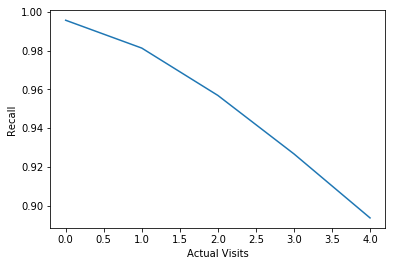

In [85]:
plt.plot(pagerank_recall_1[::-1])
plt.ylabel("Recall")
plt.xlabel("Actual Visits")
plt.show()